In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))
def count_images_in_class(test_dir, class_name):
    class_dir = os.path.join(test_dir, class_name)
    if os.path.exists(class_dir):
        return len(os.listdir(class_dir))
    else:
        return 0

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
class_name = 'cats'  # Replace with the class name you're interested in
num_images = count_images_in_class(test_dir, class_name)
print(f"{num_images} images found in class 1 in test set.")

Streaming output truncated to the last 5000 lines.
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.695.jpg  
  inflating: cats_and_dogs/tr

In [ ]:
# 3
image_gen= ImageDataGenerator(rescale=1./255)
train_image_generator =image_gen
validation_image_generator = image_gen
test_image_generator = image_gen

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,directory=train_dir,target_size=(IMG_HEIGHT,IMG_WIDTH),class_mode='binary')
val_data_gen = image_gen.flow_from_directory(batch_size=batch_size,directory=validation_dir,target_size=(IMG_HEIGHT,IMG_WIDTH),class_mode='binary')
test_data_gen = image_gen.flow_from_directory(batch_size=batch_size,directory=test_dir,target_size=(IMG_HEIGHT,IMG_WIDTH),class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


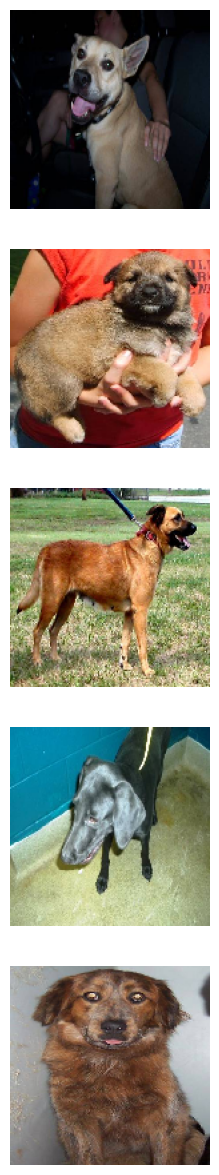

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator =ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.3,
)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)


Found 2000 images belonging to 2 classes.


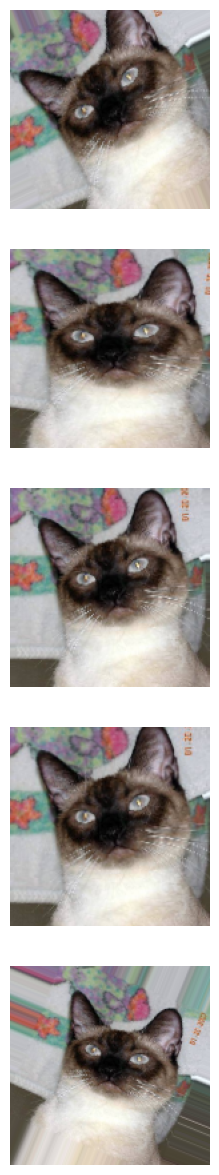

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Fourth convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening the layers
    Flatten(),

    # Fully connected layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout for regularization

    # Output layer
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',  # You can choose other optimizers like 'sgd' or 'rmsprop'
    loss='binary_crossentropy',  # Binary crossentropy for binary classification
    metrics=['accuracy']
)

# Display the model architecture
model.summary()
steps_per_epoch = total_train // batch_size
validation_steps = total_val // batch_size


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
# 8
history = model.fit(train_data_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=validation_steps)

Epoch 1/15
15/15 [==============================] - 128s 8s/step - loss: 0.7034 - accuracy: 0.5134 - val_loss: 0.6980 - val_accuracy: 0.4944
Epoch 2/15
15/15 [==============================] - 118s 8s/step - loss: 0.6929 - accuracy: 0.5101 - val_loss: 0.6893 - val_accuracy: 0.5413
Epoch 3/15
15/15 [==============================] - 119s 8s/step - loss: 0.6867 - accuracy: 0.5469 - val_loss: 0.6751 - val_accuracy: 0.5893
Epoch 4/15
15/15 [==============================] - 118s 8s/step - loss: 0.6681 - accuracy: 0.5988 - val_loss: 0.6513 - val_accuracy: 0.5949
Epoch 5/15
15/15 [==============================] - 129s 8s/step - loss: 0.6416 - accuracy: 0.6357 - val_loss: 0.6463 - val_accuracy: 0.6027
Epoch 6/15
15/15 [==============================] - 118s 8s/step - loss: 0.6392 - accuracy: 0.6474 - val_loss: 0.6122 - val_accuracy: 0.6652
Epoch 7/15
15/15 [==============================] - 117s 8s/step - loss: 0.5885 - accuracy: 0.6939 - val_loss: 0.5724 - val_accuracy: 0.6875
Epoch 8/15
15

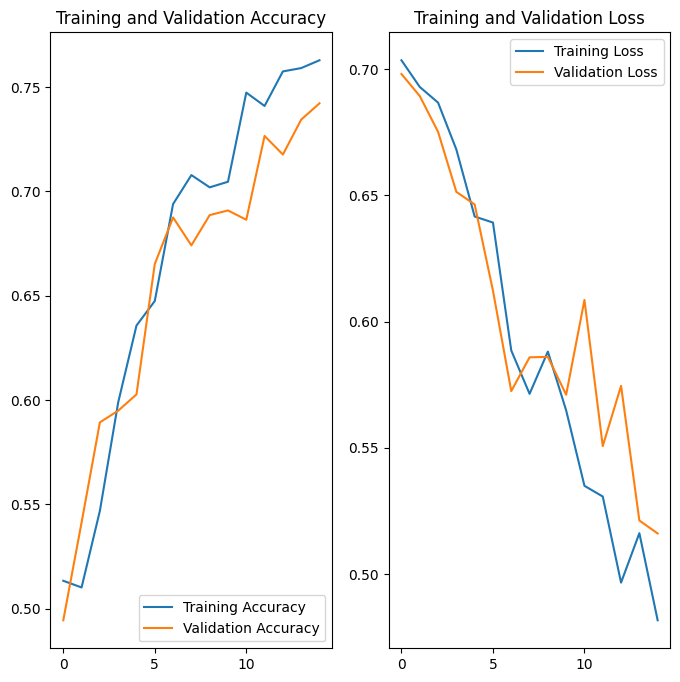

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

4/4 [==============================] - 2s 377ms/step


<ipython-input-27-8ca3736aedba>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probabilities = [int(prob > 0.5) for prob in probabilities]


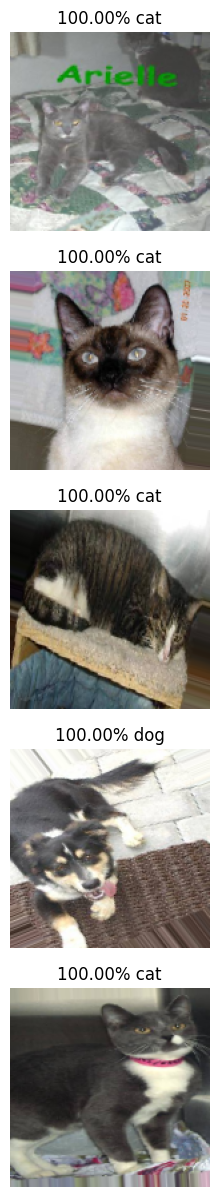

In [ ]:
test_images, _ = next(train_data_gen)
probabilities = model.predict(test_images)
probabilities = [int(prob > 0.5) for prob in probabilities]
plotImages(test_images[:5], probabilities[:5])




Found 0 images belonging to 0 classes.


ValueError: The test directory is empty or not correctly set up.

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 59

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 59 of the images. Keep trying. You will get it!")

Your model correctly identified 60.0% of the images of cats and dogs.
You passed the challenge!
